In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, Imputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

In [2]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')
train = pd.read_csv('train_clean.csv')

In [3]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
X_train, X_test, y_train, y_test = train_test_split(train.drop('TARGET',axis=1), 
                                                    train['TARGET'], test_size=0.20, 
                                                    )
    
# Feature names
features = list(X_train.columns)

# Copy of the testing data
test = X_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(X_train)

# Transform both training and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Repeat with the scaler
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (246008, 244)
Testing data shape:  (61503, 244)


# OVERSAMPLE:

### Creating oversample

In [4]:
ros = RandomOverSampler()
X_rus, y_rus = ros.fit_sample(X_train, y_train)

## Logistic regression:

### 1.1 - Training the model

In [5]:
logmodel = LogisticRegression()
logmodel.fit(X_rus,y_rus)
predictions = logmodel.predict(X_test)

In [6]:
from sklearn.model_selection import train_test_split
logmodel.score(X_test, y_test)

0.6873973627302733

### 1.2 Checking the model

In [7]:
reg_cm=confusion_matrix(y_test,predictions)
print(reg_cm)

[[38965 17596]
 [ 1630  3312]]


** Olhe a matriz de confusão **

In [8]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

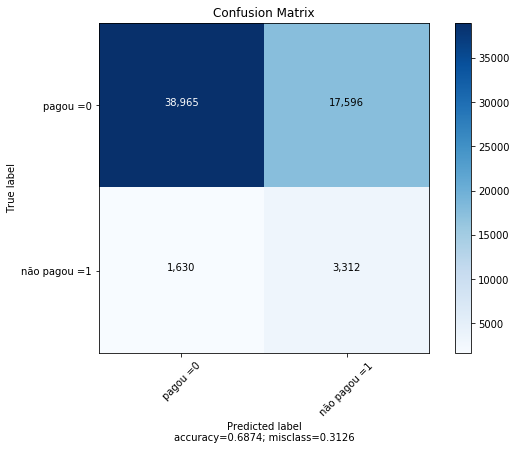

In [9]:
plot_confusion_matrix(cm           = reg_cm, 
                      normalize    = False,
                      target_names = ['pagou =0', 'não pagou =1'],
                      title        = "Confusion Matrix")

In [10]:
from sklearn.metrics import f1_score

# f1 score
f1_score(y_test, predictions) 

0.256247582205029

## XBoost

### 1.1 - Training the model

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_rus,y_rus)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 1.2 Predictions

In [12]:
# make predictions for test data
y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.91%


### 1.2 Checking the model

In [7]:
reg_cm=confusion_matrix(y_test,predictions)
print(reg_cm)

[[38965 17596]
 [ 1630  3312]]


** Olhe a matriz de confusão **

In [8]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

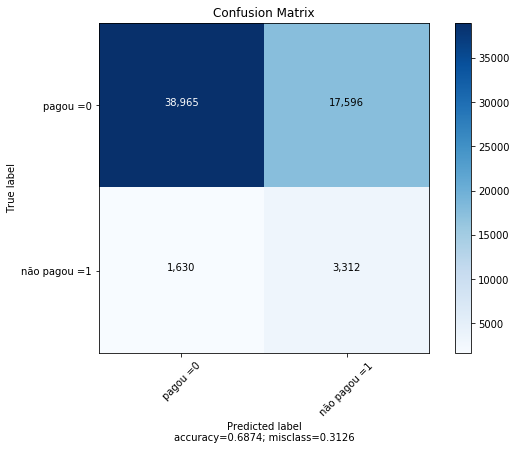

In [9]:
plot_confusion_matrix(cm           = reg_cm, 
                      normalize    = False,
                      target_names = ['pagou =0', 'não pagou =1'],
                      title        = "Confusion Matrix")

### Opening the black box - XGC Boost

### eli5

In [13]:
import eli5
eli5.show_weights(model, feature_names=features)

Weight,Feature
0.1204,EXT_SOURCE_2
0.0778,EXT_SOURCE_3
0.0554,NAME_EDUCATION_TYPE_Higher education
0.0450,CODE_GENDER_F
0.0329,FLAG_DOCUMENT_3
0.0306,DAYS_EMPLOYED
0.0301,LIVINGAREA_MODE
0.0279,EXT_SOURCE_1
0.0275,OWN_CAR_AGE
0.0262,CODE_GENDER_M


### SHAP

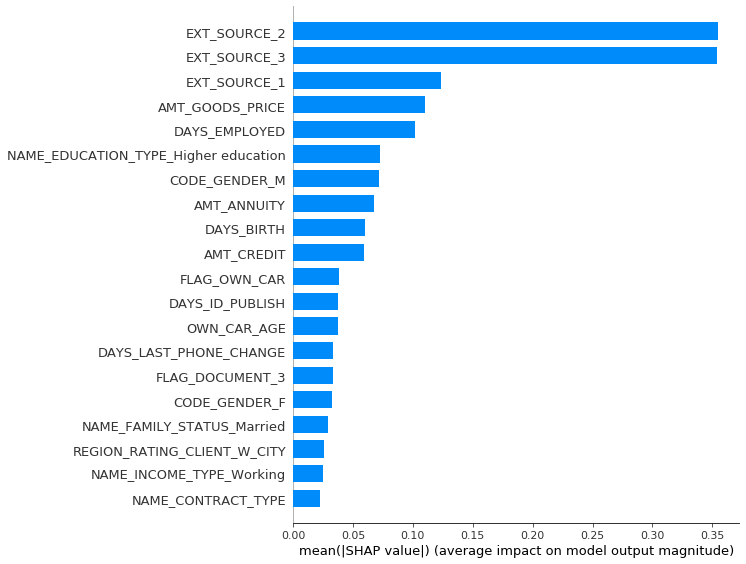

In [14]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_rus)
shap.summary_plot(shap_values, X_rus, plot_type="bar", feature_names=features)

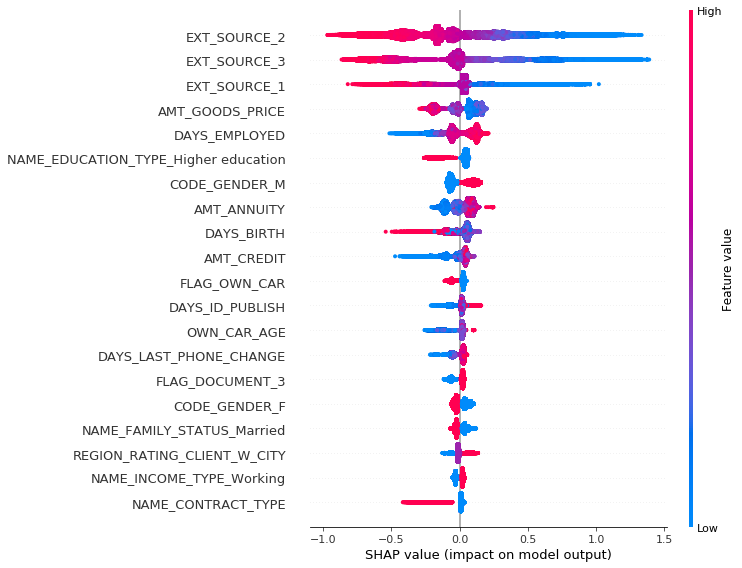

In [15]:
shap.summary_plot(shap_values, X_rus, feature_names=features)

### LIME

In [16]:
import lime
predict_fn_xgb = lambda x: model.predict_proba(x).astype(float)

explainer = lime.lime_tabular.LimeTabularExplainer(X_rus, feature_names=features, kernel_width=3)
observation_1 = 2
exp = explainer.explain_instance(X_rus[observation_1], predict_fn_xgb, num_features=6) 
exp.show_in_notebook(show_all=False)

# Neural Network

In [17]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_rus,y_rus)
predictionsNeural = mlp.predict(X_test)


In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56561
           1       0.16      0.68      0.26      4942

    accuracy                           0.69     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.90      0.69      0.76     61503



In [19]:
print(confusion_matrix(y_test,predictionsNeural))

[[37717 18844]
 [ 1898  3044]]


In [20]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

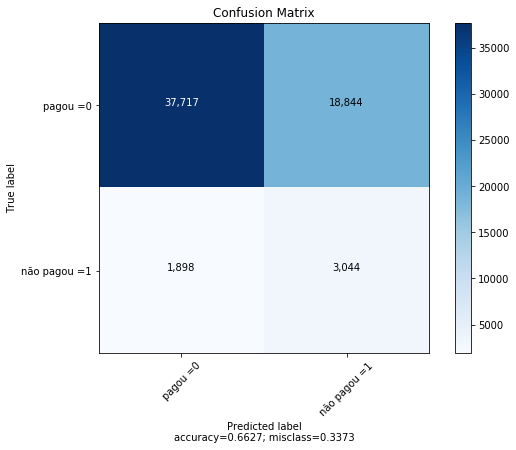

In [21]:
reg_cm=confusion_matrix(y_test,predictionsNeural)

plot_confusion_matrix(cm           = reg_cm, 
                      normalize    = False,
                      target_names = ['pagou =0', 'não pagou =1'],
                      title        = "Confusion Matrix")

# Random Florest

### 1.1 - Training the model

In [22]:
# Make the random forest classifier
random_forest = RandomForestClassifier(max_depth=10, random_state=0, n_estimators=10)

In [23]:
# Train on the training data
random_forest.fit(X_rus,y_rus)
predictionsPROB = random_forest.predict_proba(X_test)[:, 1]


### 1.2 Checking the results from random florest

In [24]:
#The labels that we gonna use bellow
labels = train.drop('TARGET',axis=1)
# Get numerical feature importances
importances = list(random_forest.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(labels.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
fi = pd.DataFrame(feature_importances)
fi[fi[1] > 0.00].head()

,0,1
0,EXT_SOURCE_3,0.23
1,EXT_SOURCE_2,0.15
2,EXT_SOURCE_1,0.06
3,DAYS_BIRTH,0.03
4,DAYS_EMPLOYED,0.03


In [25]:
# Use the forest's predict method on the test data
predictionsU3 = random_forest.predict(X_test)
# Calculate the absolute errors
errors = abs(predictionsU3 - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.31 degrees.


In [26]:
rfc_cv_score = cross_val_score(random_forest,X_rus,y_rus, cv=10, scoring='roc_auc')

In [27]:
print(confusion_matrix(y_test, predictionsU3))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictionsU3))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

[[39091 17470]
 [ 1806  3136]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56561
           1       0.15      0.63      0.25      4942

    accuracy                           0.69     61503
   macro avg       0.55      0.66      0.52     61503
weighted avg       0.89      0.69      0.76     61503



=== All AUC Scores ===
[0.78905284 0.78960553 0.789359   0.78495201 0.79202923 0.78861147
 0.78633353 0.78991976 0.79299291 0.79145682]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7894313100538402


In [28]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

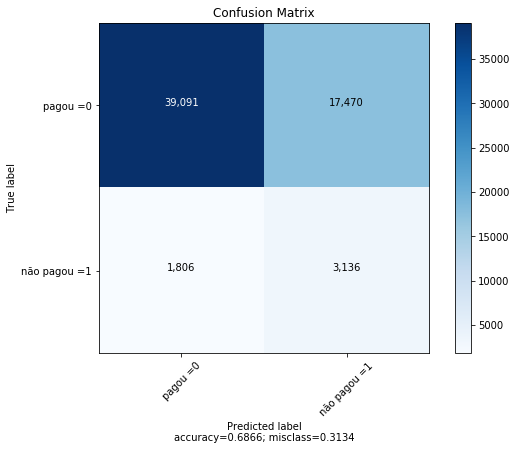

In [29]:
reg_cm=confusion_matrix(y_test,predictionsU3)

plot_confusion_matrix(cm           = reg_cm, 
                      normalize    = False,
                      target_names = ['pagou =0', 'não pagou =1'],
                      title        = "Confusion Matrix")

### Creating the decision tree pic:

In [30]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = random_forest.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = random_forest.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'TreeUnder.dot')
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('TreeUnder.dot')
# Write graph to a png file
graph.write_png('TreeUnder.png')

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.720


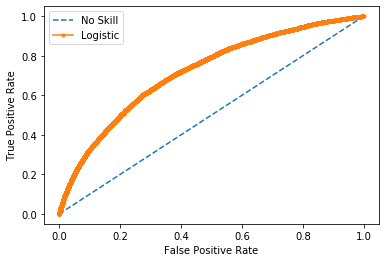

In [31]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = random_forest.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Opening the black box - Random Florest

### eli5

In [32]:
import eli5
eli5.show_weights(random_forest, feature_names=features)

Weight,Feature
0.2302 ± 0.2044,EXT_SOURCE_3
0.1496 ± 0.1195,EXT_SOURCE_2
0.0603 ± 0.1163,EXT_SOURCE_1
0.0318 ± 0.0536,DAYS_BIRTH
0.0286 ± 0.0445,DAYS_EMPLOYED
0.0273 ± 0.0590,NAME_EDUCATION_TYPE_Higher education
0.0238 ± 0.0324,DAYS_LAST_PHONE_CHANGE
0.0215 ± 0.0283,CODE_GENDER_F
0.0200 ± 0.0387,AMT_GOODS_PRICE
0.0182 ± 0.0456,NAME_EDUCATION_TYPE_Secondary / secondary special


### SHAP

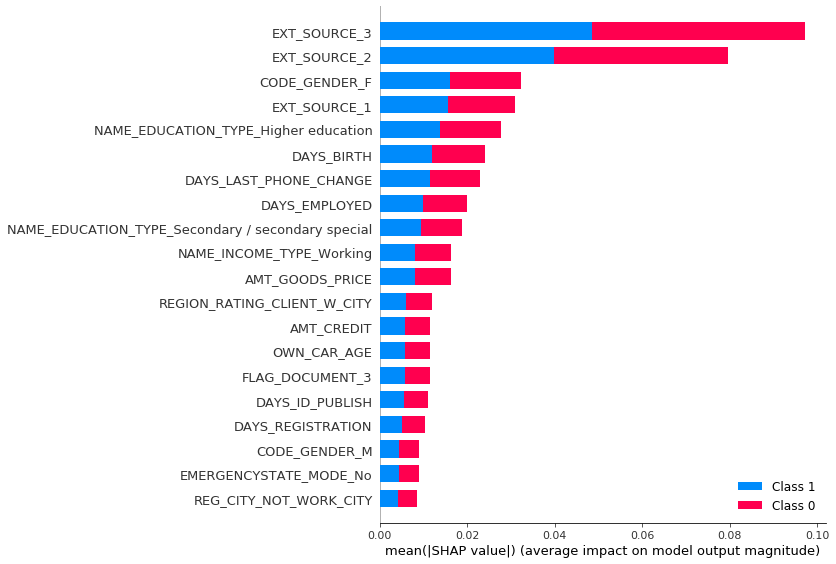

In [33]:
import shap
shap_values = shap.TreeExplainer(random_forest).shap_values(X_rus)
shap.summary_plot(shap_values, X_rus, plot_type="bar", feature_names=features)

### LIME

In [34]:
import lime
predict_fn_xgb = lambda x: random_forest.predict_proba(x).astype(float)

explainer = lime.lime_tabular.LimeTabularExplainer(X_rus, feature_names=features, kernel_width=3)
observation_1 = 2
exp = explainer.explain_instance(X_rus[observation_1], predict_fn_xgb, num_features=6) 
exp.show_in_notebook(show_all=False)

In [35]:
"""
The results were:

logistic = 68,38
XGBC = 68,3
Random tree = 68,76

with that I'll drop the columns that have feature_importances = 0 and check how that affects the models.

The most relevant feture were:

0   EXT_SOURCE_2	0.06 - 
1	EXT_SOURCE_3	0.06 -
2	Unnamed: 0	    0.03 -
3	AMT_CREDIT	    0.03 -
4	AMT_ANNUITY  	0.03 -
5	AMT_GOODS_PRICE	0.03 -
6	DAYS_BIRTH	    0.03 -
7	DAYS_EMPLOYED	0.03 -
8	DAYS_REGISTRATION	0.03 -
9	DAYS_ID_PUBLISH	0.03 -
10	EXT_SOURCE_1	0.03 -
11	DAYS_LAST_PHONE_CHANGE	0.03 -
12	SK_ID_CURR	    0.02 -

"""

"\nThe results were:\n\nlogistic = 68,38\nXGBC = 68,3\nRandom tree = 68,76\n\nwith that I'll drop the columns that have feature_importances = 0 and check how that affects the models.\n\nThe most relevant feture were:\n\n0   EXT_SOURCE_2\t0.06 - \n1\tEXT_SOURCE_3\t0.06 -\n2\tUnnamed: 0\t    0.03 -\n3\tAMT_CREDIT\t    0.03 -\n4\tAMT_ANNUITY  \t0.03 -\n5\tAMT_GOODS_PRICE\t0.03 -\n6\tDAYS_BIRTH\t    0.03 -\n7\tDAYS_EMPLOYED\t0.03 -\n8\tDAYS_REGISTRATION\t0.03 -\n9\tDAYS_ID_PUBLISH\t0.03 -\n10\tEXT_SOURCE_1\t0.03 -\n11\tDAYS_LAST_PHONE_CHANGE\t0.03 -\n12\tSK_ID_CURR\t    0.02 -\n\n"